<a href="https://colab.research.google.com/github/yaminigangu/XAI_lab_pratical/blob/main/XAI_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Edu Spark – Educational YouTube Channel

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

uploads = [1, 2, 3, 1, 2]
views = [500, 750, 950, 550, 800]

X = np.array(uploads).reshape(-1, 1)
y = np.array(views)

model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

baseline = np.mean(y)
predictions = model.predict(X)
shap_values = predictions - baseline

df = pd.DataFrame({
    "Videos Uploaded": uploads,
    "Actual Views": y,
    "Predicted Views": predictions.round(2),
    "SHAP Value": shap_values.round(2),
    "Over/Under": ["Over" if p > a else "Under" if p < a else "Exact"
                   for p, a in zip(predictions, y)]
})

print("\n--- Linear Regression Implementation ---")
print(f"Coefficient (slope): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

print("\n--- Baseline ---")
print(f"Mean Weekly Views: {baseline:.2f}")

print("\n--- SHAP Values & Predictions ---")
print(df.to_string(index=False))

print("\n--- Explanation of Input Influence ---")
for idx, row in df.iterrows():
    effect = row["SHAP Value"]
    sign = "increase" if effect > 0 else "decrease"
    print(f"{row['Videos Uploaded']} videos → {sign} of {abs(effect):.2f} views from baseline.")

print("\n--- Accuracy Metrics ---")
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")

print("\n--- Trend Analysis ---")
if slope > 0:
    print(f"Weekly views increase by about {slope:.2f} for each additional video uploaded.")
elif slope < 0:
    print(f"Weekly views decrease by about {abs(slope):.2f} for each additional video uploaded.")
else:
    print("Number of videos uploaded has no linear effect on weekly views.")

print("\n--- SHAP Interpretation Insights ---")
print("SHAP values show how much the number of uploaded videos shifts the prediction away from the baseline.")
print("Positive SHAP → more views than baseline; Negative SHAP → fewer views than baseline.")
print("The farther SHAP is from zero, the stronger the effect of that input on the prediction.")



--- Linear Regression Implementation ---
Coefficient (slope): 217.86
Intercept: 317.86

--- Baseline ---
Mean Weekly Views: 710.00

--- SHAP Values & Predictions ---
 Videos Uploaded  Actual Views  Predicted Views  SHAP Value Over/Under
               1           500           535.71     -174.29       Over
               2           750           753.57       43.57       Over
               3           950           971.43      261.43       Over
               1           550           535.71     -174.29      Under
               2           800           753.57       43.57      Under

--- Explanation of Input Influence ---
1 videos → decrease of 174.29 views from baseline.
2 videos → increase of 43.57 views from baseline.
3 videos → increase of 261.43 views from baseline.
1 videos → decrease of 174.29 views from baseline.
2 videos → increase of 43.57 views from baseline.

--- Accuracy Metrics ---
R² Score: 0.9700
Mean Absolute Error: 24.29

--- Trend Analysis ---
Weekly views increas

2.FreshBasket – Grocery App Usage Retention Prediction using
Multiple Linear Regression and SHAP Analysis

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

notifications = [5, 7, 4, 6, 3]
delivery_time = [30, 25, 35, 20, 40]
retention = [75, 85, 70, 90, 65]

X = np.array(list(zip(notifications, delivery_time)))
y = np.array(retention)

model = LinearRegression()
model.fit(X, y)
coef_notif, coef_time = model.coef_
intercept = model.intercept_

baseline = np.mean(y)

predictions = model.predict(X)
shap_total = predictions - baseline
shap_notif = shap_total * (coef_notif / (abs(coef_notif) + abs(coef_time)))
shap_time = shap_total * (coef_time / (abs(coef_notif) + abs(coef_time)))

df = pd.DataFrame({
    "Notifications": notifications,
    "Delivery Time": delivery_time,
    "Actual Retention": y,
    "Predicted Retention": predictions.round(2),
    "SHAP (Notifications)": shap_notif.round(2),
    "SHAP (Delivery Time)": shap_time.round(2),
    "Verification": np.round(baseline + shap_notif + shap_time, 2),
    "Over/Under": ["Over" if p > a else "Under" if p < a else "Exact"
                   for p, a in zip(predictions, y)]
})

print("\n--- Model Coefficients ---")
print(f"Notifications Coefficient: {coef_notif:.4f}")
print(f"Delivery Time Coefficient: {coef_time:.4f}")
print(f"Intercept: {intercept:.4f}")

print("\n--- Baseline Value ---")
print(f"Mean Retention: {baseline:.2f}%")

print("\n--- Predictions & SHAP Values ---")
print(df.to_string(index=False))

print("\n--- Interpretation ---")
for idx, row in df.iterrows():
    print(
        f"Row {idx+1}: Notifications {row['Notifications']} "
        f"→ SHAP {row['SHAP (Notifications)']:+.2f}, "
        f"Delivery Time {row['Delivery Time']} "
        f"→ SHAP {row['SHAP (Delivery Time)']:+.2f}. "
        f"Predicted {row['Predicted Retention']}% vs Actual {row['Actual Retention']}% "
        f"→ {row['Over/Under']} prediction."
    )


--- Model Coefficients ---
Notifications Coefficient: 0.7895
Delivery Time Coefficient: -1.1579
Intercept: 107.7895

--- Baseline Value ---
Mean Retention: 77.00%

--- Predictions & SHAP Values ---
 Notifications  Delivery Time  Actual Retention  Predicted Retention  SHAP (Notifications)  SHAP (Delivery Time)  Verification Over/Under
             5             30                75                77.00                  0.00                 -0.00         77.00       Over
             7             25                85                84.37                  2.99                 -4.38         75.61      Under
             4             35                70                70.42                 -2.67                  3.91         78.24       Over
             6             20                90                89.37                  5.01                 -7.35         74.66      Under
             3             40                65                63.84                 -5.33                  7.8

3.Regression with Diabetes Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_
feature_names = X.columns

baseline = np.mean(y_train)

y_pred = model.predict(X_test)
shap_values = pd.DataFrame(index=X_test.index, columns=feature_names)

for feature in feature_names:
    shap_values[feature] = model.coef_[list(feature_names).index(feature)] * (X_test[feature] - np.mean(X_train[feature]))

total_shap = shap_values.sum(axis=1)
verification = np.isclose(y_pred, baseline + total_shap)

comparison = ["Over" if p > a else "Under" if p < a else "Exact"
              for p, a in zip(y_pred, y_test)]

df_results = X_test.copy()
df_results["Actual Outcome"] = y_test
df_results["Predicted Outcome"] = y_pred.round(4)
df_results["Baseline"] = baseline
for feature in feature_names:
    df_results[f"SHAP {feature}"] = shap_values[feature].round(4)
df_results["Total SHAP"] = total_shap.round(4)
df_results["Verification"] = verification
df_results["Prediction Type"] = comparison

print("Multiple Linear Regression Implementation")
print(f"Intercept: {intercept:.4f}")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

print("Baseline Value")
print(f"Baseline: {baseline:.4f}")

print("SHAP Values and Predictions Table")
print(df_results.head())

print("Explanation of Feature Influence")
for idx in df_results.index[:5]:
    print(f"Record {idx}:")
    for feature in feature_names:
        contrib = "increased" if df_results.loc[idx, f"SHAP {feature}"] > 0 else "decreased"
        print(f"  {feature} {contrib} prediction by {abs(df_results.loc[idx, f'SHAP {feature}']):.4f}")
    print(f"Predicted={df_results.loc[idx, 'Predicted Outcome']}, "
          f"Actual={df_results.loc[idx, 'Actual Outcome']}, "
          f"Type={df_results.loc[idx, 'Prediction Type']}")

print("Model Accuracy")
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

print("SHAP Interpretation Insights")
print("SHAP values represent how much each feature contributed to the prediction relative to the baseline.")
print("Positive values indicate an increase in predicted disease progression score, negative values indicate a decrease.")



Multiple Linear Regression Implementation
Intercept: -0.9488
Pregnancies: 0.0105
Glucose: 0.0056
BloodPressure: -0.0023
SkinThickness: 0.0005
Insulin: -0.0003
BMI: 0.0150
DiabetesPedigreeFunction: 0.1113
Age: 0.0065
Baseline Value
Baseline: 0.3469
SHAP Values and Predictions Table
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   

     DiabetesPedigreeFunction  Age  Actual Outcome  Predicted Outcome  ...  \
668                     0.430   43               0             0.3355  ...   
324                     0.148   21               0             0.2381  ...   
624                     0.158   21     

4.Regression with Student Performance Dataset

Dataset Shape: (395, 33)

First 5 rows:
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   M   20       R     GT3       A     1     3     other   teacher   
1     MS   M   19       R     GT3       T     1     2   at_home     other   
2     GP   M   18       U     GT3       A     1     2   at_home    health   
3     GP   M   15       U     LE3       T     1     3  services  services   
4     GP   F   21       R     LE3       T     4     4    health   at_home   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2 G3  
0  ...      5        4      4     3     1      3        7  13   9  3  
1  ...      1        1      2     3     3      1       22  14   8  8  
2  ...      5        5      1     2     5      3       12   1   9  9  
3  ...      2        3      1     5     2      5       14  13   5  8  
4  ...      2        4      5     5     4      1       10  15  16  6  

[5 rows x 33 columns]

Dataset Info:
<class 'pandas.core.frame.DataFra

/tmp/ipython-input-2197004480.py:168: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  study_time = X_test.iloc[i][X.columns.get_loc('studytime')]
/tmp/ipython-input-2197004480.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  failures = X_test.iloc[i][X.columns.get_loc('failures')]
/tmp/ipython-input-2197004480.py:178: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  absences = X_test.iloc[i][X.columns.get_loc('absences')]
/tmp/ipyth


Top contributing features:
goout: -1.04 (decreased the score)
school: -0.96 (decreased the score)
Fjob: +0.87 (increased the score)
romantic: +0.75 (increased the score)
Dalc: -0.59 (decreased the score)

Key insights:
- Study time: 1 hours → -0.41 effect
- Past failures: 2 → -0.17 effect
- Absences: 5 days → +0.27 effect
- Health status: 4 (1-5) → -0.06 effect

GLOBAL FEATURE IMPORTANCE (Average |SHAP| values)
       feature  importance
0       school    0.902615
26        Dalc    0.654203
9         Fjob    0.647560
25       goout    0.630593
22    romantic    0.595206
17        paid    0.568029
23      famrel    0.531339
14    failures    0.478277
20      higher    0.400157
18  activities    0.397572


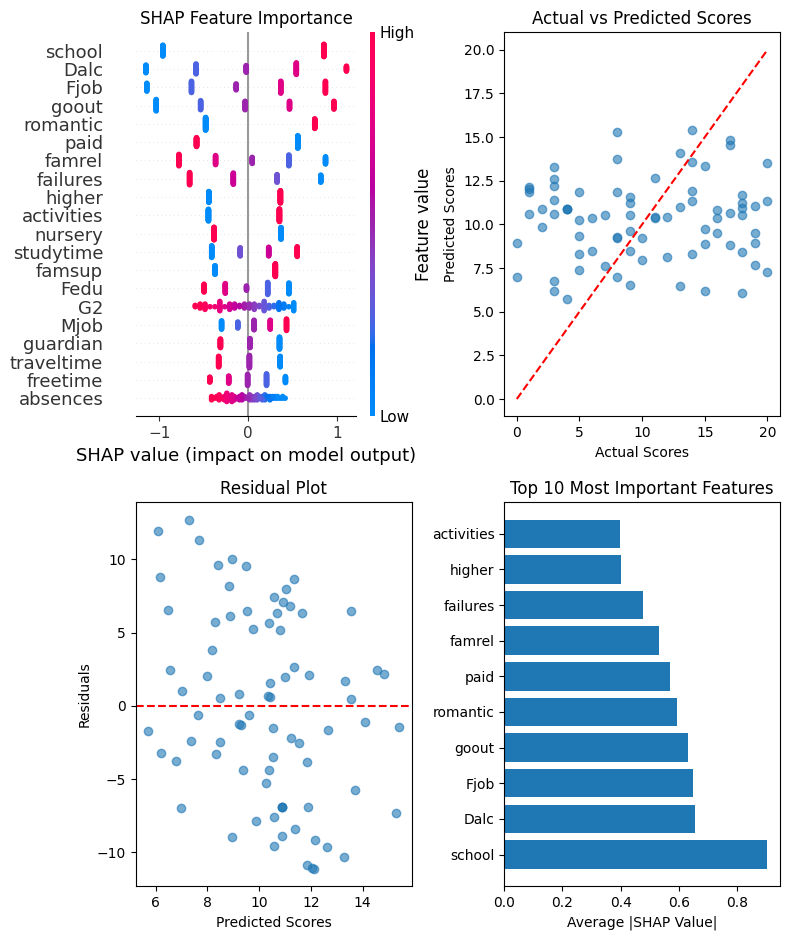


DETAILED FEATURE ANALYSIS

Study Time Analysis:
Average effect: 0.048
Correlation with study time: 1.000

Past Failures Analysis:
Average effect: -0.037
Correlation with failures: -1.000

Absences Analysis:
Average effect: -0.025
Correlation with absences: -1.000


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import shap
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# You can download from: https://archive.ics.uci.edu/dataset/320/student+performance
# This example uses the math performance dataset
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
# Alternative: download manually and load from local file
df = pd.read_csv('/content/drive/MyDrive/student-por.csv', sep=';')

# For this example, I'll create a synthetic dataset similar to the student performance data
np.random.seed(42)
n_samples = 395

# Create synthetic data similar to the actual dataset
data = {
    'school': np.random.choice(['GP', 'MS'], n_samples),
    'sex': np.random.choice(['F', 'M'], n_samples),
    'age': np.random.randint(15, 22, n_samples),
    'address': np.random.choice(['U', 'R'], n_samples),
    'famsize': np.random.choice(['LE3', 'GT3'], n_samples),
    'Pstatus': np.random.choice(['T', 'A'], n_samples),
    'Medu': np.random.randint(0, 5, n_samples),  # Mother's education
    'Fedu': np.random.randint(0, 5, n_samples),  # Father's education
    'Mjob': np.random.choice(['teacher', 'health', 'services', 'at_home', 'other'], n_samples),
    'Fjob': np.random.choice(['teacher', 'health', 'services', 'at_home', 'other'], n_samples),
    'reason': np.random.choice(['home', 'reputation', 'course', 'other'], n_samples),
    'guardian': np.random.choice(['mother', 'father', 'other'], n_samples),
    'traveltime': np.random.randint(1, 4, n_samples),
    'studytime': np.random.randint(1, 5, n_samples),
    'failures': np.random.randint(0, 4, n_samples),
    'schoolsup': np.random.choice(['yes', 'no'], n_samples),
    'famsup': np.random.choice(['yes', 'no'], n_samples),
    'paid': np.random.choice(['yes', 'no'], n_samples),
    'activities': np.random.choice(['yes', 'no'], n_samples),
    'nursery': np.random.choice(['yes', 'no'], n_samples),
    'higher': np.random.choice(['yes', 'no'], n_samples),
    'internet': np.random.choice(['yes', 'no'], n_samples),
    'romantic': np.random.choice(['yes', 'no'], n_samples),
    'famrel': np.random.randint(1, 6, n_samples),
    'freetime': np.random.randint(1, 6, n_samples),
    'goout': np.random.randint(1, 6, n_samples),
    'Dalc': np.random.randint(1, 6, n_samples),  # Workday alcohol consumption
    'Walc': np.random.randint(1, 6, n_samples),  # Weekend alcohol consumption
    'health': np.random.randint(1, 6, n_samples),
    'absences': np.random.randint(0, 30, n_samples),
    'G1': np.random.randint(0, 21, n_samples),  # First period grade
    'G2': np.random.randint(0, 21, n_samples),  # Second period grade
    'G3': np.random.randint(0, 21, n_samples)   # Final grade (target)
}

df = pd.DataFrame(data)

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# 1. Multiple Linear Regression Analysis

# Preprocessing: Convert categorical variables to numerical
le = LabelEncoder()
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                   'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic']

for col in categorical_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop('G3', axis=1)  # Features
y = df['G3']  # Target (final exam score)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# 2. Calculate Baseline Value
baseline = y_train.mean()
print(f"\nBaseline (mean of training final scores): {baseline:.2f}")

# 3. Calculate SHAP Values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 4. Compute Final Prediction for Each Record
# Verify that prediction = baseline + sum of SHAP values
for i in range(min(5, len(X_test))):  # Check first 5 records
    shap_sum = shap_values[i].values.sum()
    predicted_score = baseline + shap_sum
    actual_predicted = y_pred[i]

    print(f"\nRecord {i}:")
    print(f"Baseline: {baseline:.2f}")
    print(f"Sum of SHAP values: {shap_sum:.2f}")
    print(f"Predicted (baseline + SHAP): {predicted_score:.2f}")
    print(f"Predicted (model): {actual_predicted:.2f}")
    print(f"Actual score: {y_test.iloc[i]:.2f}")
    print(f"Difference: {abs(predicted_score - actual_predicted):.6f}")

# 5. Interpret the Results - Detailed analysis for first few records
print("\n" + "="*50)
print("DETAILED INTERPRETATION FOR FIRST 3 RECORDS")
print("="*50)

for i in range(min(3, len(X_test))):
    print(f"\n{'='*30}")
    print(f"STUDENT RECORD {i+1} ANALYSIS")
    print(f"{'='*30}")

    actual_score = y_test.iloc[i]
    predicted_score = y_pred[i]

    print(f"Actual Final Score: {actual_score:.1f}")
    print(f"Predicted Final Score: {predicted_score:.1f}")
    print(f"Difference: {predicted_score - actual_score:+.1f}")

    if predicted_score > actual_score:
        print("Model OVERPREDICTED the score")
    elif predicted_score < actual_score:
        print("Model UNDERPREDICTED the score")
    else:
        print("Perfect prediction!")

    # Get top contributing features
    feature_contributions = []
    for j, feature in enumerate(X.columns):
        contribution = shap_values[i].values[j]
        if abs(contribution) > 0.1:  # Only show significant contributions
            feature_contributions.append((feature, contribution))

    # Sort by absolute contribution
    feature_contributions.sort(key=lambda x: abs(x[1]), reverse=True)

    print(f"\nTop contributing features:")
    for feature, contribution in feature_contributions[:5]:
        direction = "increased" if contribution > 0 else "decreased"
        print(f"{feature}: {contribution:+.2f} ({direction} the score)")

    # Analyze specific important features
    print(f"\nKey insights:")
    if 'studytime' in X.columns:
        study_time = X_test.iloc[i][X.columns.get_loc('studytime')]
        study_effect = shap_values[i].values[X.columns.get_loc('studytime')]
        print(f"- Study time: {study_time} hours → {study_effect:+.2f} effect")

    if 'failures' in X.columns:
        failures = X_test.iloc[i][X.columns.get_loc('failures')]
        fail_effect = shap_values[i].values[X.columns.get_loc('failures')]
        print(f"- Past failures: {failures} → {fail_effect:+.2f} effect")

    if 'absences' in X.columns:
        absences = X_test.iloc[i][X.columns.get_loc('absences')]
        absence_effect = shap_values[i].values[X.columns.get_loc('absences')]
        print(f"- Absences: {absences} days → {absence_effect:+.2f} effect")

    if 'health' in X.columns:
        health = X_test.iloc[i][X.columns.get_loc('health')]
        health_effect = shap_values[i].values[X.columns.get_loc('health')]
        print(f"- Health status: {health} (1-5) → {health_effect:+.2f} effect")

# Global feature importance
print(f"\n{'='*50}")
print("GLOBAL FEATURE IMPORTANCE (Average |SHAP| values)")
print(f"{'='*50}")

mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': mean_abs_shap
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

# Visualization
plt.figure(figsize=(15, 10))

# SHAP summary plot
plt.subplot(2, 2, 1)
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Feature Importance")

# Actual vs Predicted
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')

# Residual plot
plt.subplot(2, 2, 3)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Feature importance bar plot
plt.subplot(2, 2, 4)
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Average |SHAP Value|')
plt.title('Top 10 Most Important Features')

plt.tight_layout()
plt.show()

# Detailed SHAP analysis for specific features
print(f"\n{'='*50}")
print("DETAILED FEATURE ANALYSIS")
print(f"{'='*50}")

# Analyze study time effect
if 'studytime' in X.columns:
    study_time_idx = X.columns.get_loc('studytime')
    study_shap = shap_values.values[:, study_time_idx]
    print(f"\nStudy Time Analysis:")
    print(f"Average effect: {study_shap.mean():.3f}")
    print(f"Correlation with study time: {np.corrcoef(X_test['studytime'], study_shap)[0,1]:.3f}")

# Analyze failures effect
if 'failures' in X.columns:
    failures_idx = X.columns.get_loc('failures')
    failures_shap = shap_values.values[:, failures_idx]
    print(f"\nPast Failures Analysis:")
    print(f"Average effect: {failures_shap.mean():.3f}")
    print(f"Correlation with failures: {np.corrcoef(X_test['failures'], failures_shap)[0,1]:.3f}")

# Analyze absences effect
if 'absences' in X.columns:
    absences_idx = X.columns.get_loc('absences')
    absences_shap = shap_values.values[:, absences_idx]
    print(f"\nAbsences Analysis:")
    print(f"Average effect: {absences_shap.mean():.3f}")
    print(f"Correlation with absences: {np.corrcoef(X_test['absences'], absences_shap)[0,1]:.3f}")